# Codecademy Portfolio Project: Biodiversity in National Parks

Goal:

 - Interpret data from the National Parks Service about endangered species in different parks
 - Investigate if there are any patterns or themes to the types of species that become endangered.
 
Provided Resources:
 
 - observations.csv
 - species_info.csv

In [1]:
# import section ------------------------------------------------------------------------------------------------------------- #
# updated with progress, sorted by purpose of the library -------------------------------------------------------------------- #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the provided csv-files and taking a look at them to get an overview over the provided data.

In [2]:
# read provided "observations.csv" as pandas dataframe and assign it to a variable ------------------------------------------- #
observations_df = pd.read_csv("./CC_provided_resources/observations.csv")

observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
# print first 10 rows of "observations.csv" ---------------------------------------------------------------------------------- #
observations_df.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [4]:
# read provided "species_info.csv" as pandas dataframe and assign it to a variable ------------------------------------------- #
species_info_df = pd.read_csv("./CC_provided_resources/species_info.csv")

species_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
# print first 10 rows of "species_info.csv" ---------------------------------------------------------------------------------- #
species_info_df.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Initial insights:
 - The dataframes need to be joined with an inner join on "scientific_name" column.
 - Need to check unique entries in both "scientific_name" columns beforehand, wether or not, there is a mismatch.
 - Check data-type of "NaN" values, replace with "null" type if needed.
 - Check text columns data-type, convert dtype to string.
 - Causal questions will be raised further into the analysis, because of unfamiliarity with the subject.

In [6]:
# print unique entries (and count thereof) for "scientific_name" to check if mismatches occur with inner_join ---------------- #
obs_unique = observations_df["scientific_name"].unique()
obs_nunique = observations_df["scientific_name"].nunique()
obs_sorted = np.sort(obs_unique)
print(obs_sorted)
print(obs_nunique)

['Abies bifolia' 'Abies concolor' 'Abies fraseri' ...
 'Zonotrichia querula' 'Zygodon viridissimus'
 'Zygodon viridissimus var. rupestris']
5541


In [7]:
# print unique entries (and count thereof) for "scientific_name" to check if mismatches occur with inner_join ---------------- #
info_unique = species_info_df["scientific_name"].unique()
info_nunique = species_info_df["scientific_name"].nunique()
info_sorted = np.sort(info_unique)
print(info_sorted)
print(info_nunique)

['Abies bifolia' 'Abies concolor' 'Abies fraseri' ...
 'Zonotrichia querula' 'Zygodon viridissimus'
 'Zygodon viridissimus var. rupestris']
5541


In [8]:
# above output suggests, there will not be a mismatch, still performing a full comparison ------------------------------------ #
if np.array_equal(obs_sorted ,info_sorted):
    print("They are identical!")
else:
    print("They are NOT identical!")

They are identical!


As both sorted arrays are identical, it can be concluded that an inner join_can be performed and there will not be a loss of data. (Or in case of an outer_join, there will be no rows with missing values.)

In [9]:
# joining observations.csv and species_info.csv on "scientific_name" columns ------------------------------------------------- #
all_data_df = observations_df.merge(species_info_df, on="scientific_name", how="inner")
all_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


Beeing unfamiliar with the subject I will perform an exploratory analysis, to get an idea what type of relations one might want to look for.
Beforehand, I will convert columns with text-values to string for ease of use.

In [10]:
# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
all_data_df = all_data_df.astype(
{"scientific_name":"string", "park_name":"string", "category":"string", "common_names":"string", "conservation_status":"string"}
)

# fill null-values in conservation_status with "None" ------------------------------------------------------------------------ #
all_data_df.conservation_status.fillna(value="None", inplace=True)

all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  string
 1   park_name            25632 non-null  string
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  string
 4   common_names         25632 non-null  string
 5   conservation_status  25632 non-null  string
dtypes: int64(1), string(5)
memory usage: 1.4 MB


To get a general overview I will look at the distribution of the "conservation_status" across, "park_name" and "category". As well as look at the distribution of observations for different "conservation_status" levels.


In [11]:
# total number of categories for some of the metrics ------------------------------------------------------------------------- #

# Parks encompased by the dataframe ------------------------------------------------------------------------------------------ #
print("")
print("Parks encompased by the dataframe:")
print(all_data_df["park_name"].unique())

# Categories of animals encompased by the dataframe -------------------------------------------------------------------------- #
print("")
print("Categories of animals encompased by the dataframe:")
print(all_data_df["category"].unique())

# list of all conservation_status -------------------------------------------------------------------------------------------- #
print("")
print("Conservation_status:")
print(all_data_df["conservation_status"].unique())

# Unique species ------------------------------------------------------------------------------------------------------------- #
print("")
print("Unique species in 'all_data_df':")
print(all_data_df["scientific_name"].nunique())




Parks encompased by the dataframe:
<StringArray>
['Great Smoky Mountains National Park',              'Yosemite National Park',
           'Yellowstone National Park',                 'Bryce National Park']
Length: 4, dtype: string

Categories of animals encompased by the dataframe:
<StringArray>
[   'Vascular Plant',            'Mammal',              'Bird',
 'Nonvascular Plant',         'Amphibian',           'Reptile',
              'Fish']
Length: 7, dtype: string

Conservation_status:
<StringArray>
['None', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
Length: 5, dtype: string

Unique species in 'all_data_df':
5541


In [12]:
# subsets of "all_data_df" for each park ------------------------------------------------------------------------------------- #
park_gsm_df = all_data_df.loc[all_data_df.park_name == "Great Smoky Mountains National Park"]
park_yosemite_df = all_data_df.loc[all_data_df.park_name == "Yosemite National Park"]
park_yellowstone_df = all_data_df.loc[all_data_df.park_name == "Yellowstone National Park"]
park_bryce_df = all_data_df.loc[all_data_df.park_name == "Bryce National Park"]

# subsets of "all_data_df" for each animal category -------------------------------------------------------------------------- #
category_vasc_plant_df = all_data_df.loc[all_data_df.category == "Vascular Plant"]
category_nonvasc_plant_df = all_data_df.loc[all_data_df.category == "Nonvascular Plant"]
category_mammal_df = all_data_df.loc[all_data_df.category == "Mammal"]
category_bird_df = all_data_df.loc[all_data_df.category == "Bird"]
category_amphibian_df = all_data_df.loc[all_data_df.category == "Amphibian"]
category_reptile_df = all_data_df.loc[all_data_df.category == "Reptile"]
category_fish_df = all_data_df.loc[all_data_df.category == "Fish"]

# variables for plotting ----------------------------------------------------------------------------------------------------- #
order = ['None', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']

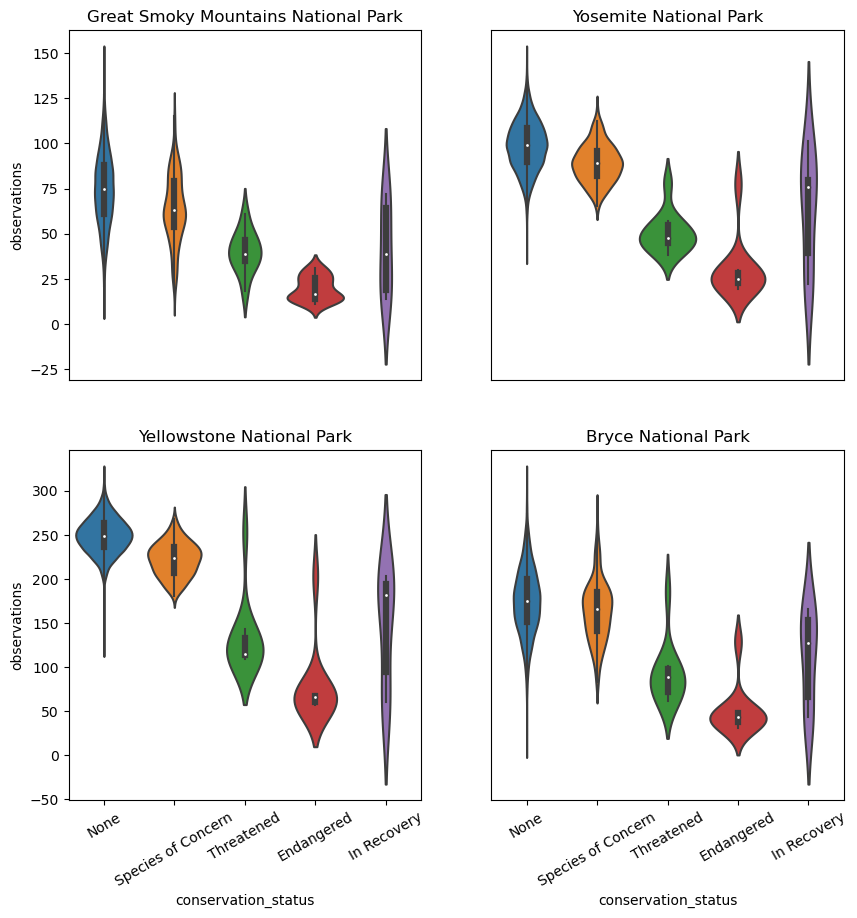

In [13]:
# scatterplots to visualize wether or not there is a pattern in conservation_status, by park or category --------------------- #

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
sns.violinplot(data=park_gsm_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Great Smoky Mountains National Park")
plt.xlabel("")
plt.xticks(ticks=[], rotation=30)

ax = fig.add_subplot(2, 2, 2)
sns.violinplot(data=park_yosemite_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Yosemite National Park")
plt.xlabel("")
plt.xticks(ticks=[], rotation=30)
plt.ylabel("")
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 2, 3)
sns.violinplot(data=park_yellowstone_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Yellowstone National Park")
plt.xticks(rotation=30)

ax = fig.add_subplot(2, 2, 4)
sns.violinplot(data=park_bryce_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Bryce National Park")
plt.xticks(rotation=30)
plt.ylabel("")
plt.yticks(ticks=[])

plt.show()

<Figure size 640x480 with 0 Axes>

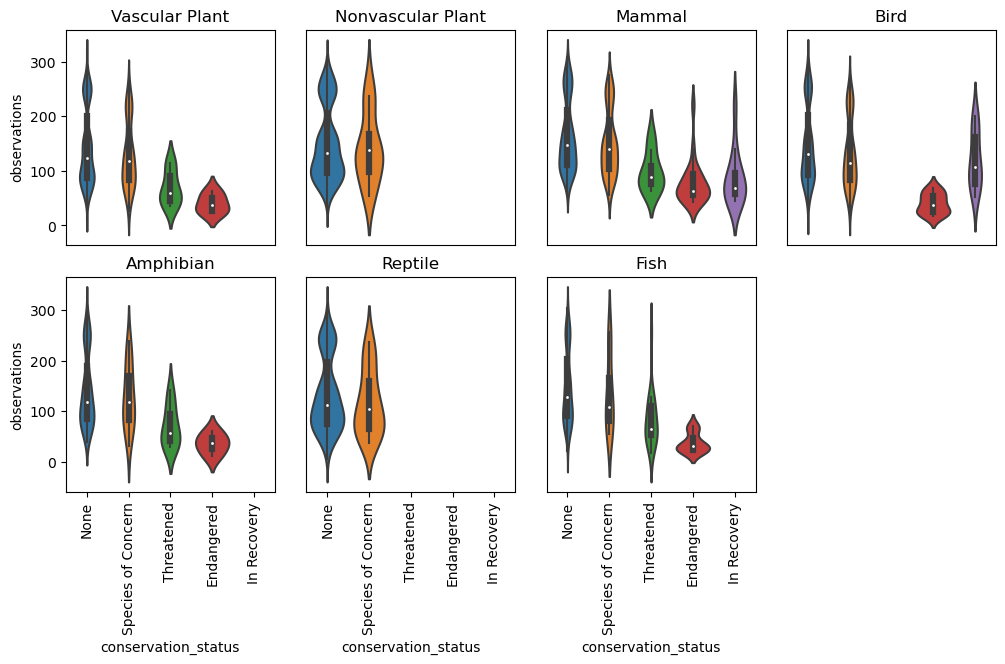

In [14]:
# scatterplots to visualize wether or not there is a pattern in conservation_status, by park or category --------------------- #
plt.clf()

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.15, wspace=0.15)

ax = fig.add_subplot(2, 4, 1)
sns.violinplot(data=category_vasc_plant_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Vascular Plant")
plt.xlabel("")
plt.xticks(ticks=[])

ax = fig.add_subplot(2, 4, 2)
sns.violinplot(data=category_nonvasc_plant_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Nonvascular Plant")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 3)
sns.violinplot(data=category_mammal_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Mammal")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 4)
sns.violinplot(data=category_bird_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Bird")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 5)
sns.violinplot(data=category_amphibian_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Amphibian")
plt.xticks(rotation=90)

ax = fig.add_subplot(2, 4, 6)
sns.violinplot(data=category_reptile_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Reptile")
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 7)
sns.violinplot(data=category_fish_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Fish")
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks(ticks=[])

plt.show()

In [15]:
# count per category --------------------------------------------------------------------------------------------------------- #
park_count_df = all_data_df.groupby("park_name").count()

# entries per category into the database ------------------------------------------------------------------------------------- #
park_count_df.drop(columns=["category", "observations", "common_names", "conservation_status"], inplace=True)
park_count_df.rename(columns={"scientific_name":"total_count"}, inplace=True)

# count of no_status and status for each category ---------------------------------------------------------------------------- #
park_count_df["no_status_count"] = all_data_df[all_data_df.conservation_status == "None"].groupby("park_name").count().scientific_name
park_count_df["status_count"] = all_data_df[all_data_df.conservation_status != "None"].groupby("park_name").count().scientific_name

# count for each individual status per category ------------------------------------------------------------------------------ #
park_count_df["concern_count"] = all_data_df[all_data_df.conservation_status == "Species of Concern"].groupby("park_name").count().scientific_name
park_count_df["threatened_count"] = all_data_df[all_data_df.conservation_status == "Threatened"].groupby("park_name").count().scientific_name
park_count_df["endangered_count"] = all_data_df[all_data_df.conservation_status == "Endangered"].groupby("park_name").count().scientific_name
park_count_df["recovery_count"] = all_data_df[all_data_df.conservation_status == "In Recovery"].groupby("park_name").count().scientific_name

# fill NaN-values in category_count_df with 0 -------------------------------------------------------------------------------- #
park_count_df.fillna(value=0, inplace=True)

# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
park_count_df = park_count_df.astype({"threatened_count":"int", "endangered_count":"int", "recovery_count":"int"})

park_count_df

,total_count,no_status_count,status_count,concern_count,threatened_count,endangered_count,recovery_count
park_name,,,,,,,
Bryce National Park,6408,6188,220,183,11,20,6
Great Smoky Mountains National Park,6408,6188,220,183,11,20,6
Yellowstone National Park,6408,6188,220,183,11,20,6
Yosemite National Park,6408,6188,220,183,11,20,6


In [16]:
# count per category --------------------------------------------------------------------------------------------------------- #
category_count_df = all_data_df.groupby("category").count()

# entries per category into the database ------------------------------------------------------------------------------------- #
category_count_df.drop(columns=["park_name", "observations", "common_names", "conservation_status"], inplace=True)
category_count_df.rename(columns={"scientific_name":"total_count"}, inplace=True)

# count of no_status and status for each category ---------------------------------------------------------------------------- #
category_count_df["no_status_count"] = all_data_df[all_data_df.conservation_status == "None"].groupby("category").count().scientific_name
category_count_df["status_count"] = all_data_df[all_data_df.conservation_status != "None"].groupby("category").count().scientific_name

# count for each individual status per category ------------------------------------------------------------------------------ #
category_count_df["concern_count"] = all_data_df[all_data_df.conservation_status == "Species of Concern"].groupby("category").count().scientific_name
category_count_df["threatened_count"] = all_data_df[all_data_df.conservation_status == "Threatened"].groupby("category").count().scientific_name
category_count_df["endangered_count"] = all_data_df[all_data_df.conservation_status == "Endangered"].groupby("category").count().scientific_name
category_count_df["recovery_count"] = all_data_df[all_data_df.conservation_status == "In Recovery"].groupby("category").count().scientific_name

# fill NaN-values in category_count_df with 0 -------------------------------------------------------------------------------- #
category_count_df.fillna(value=0, inplace=True)

# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
category_count_df = category_count_df.astype({"threatened_count":"int", "endangered_count":"int", "recovery_count":"int"})

category_count_df

,total_count,no_status_count,status_count,concern_count,threatened_count,endangered_count,recovery_count
category,,,,,,,
Amphibian,328,300,28,16,8,4,0
Bird,2364,2016,348,320,0,16,12
Fish,524,476,48,16,20,12,0
Mammal,1200,968,232,168,8,44,12
Nonvascular Plant,1332,1312,20,20,0,0,0
Reptile,324,304,20,20,0,0,0
Vascular Plant,19560,19376,184,172,8,4,0


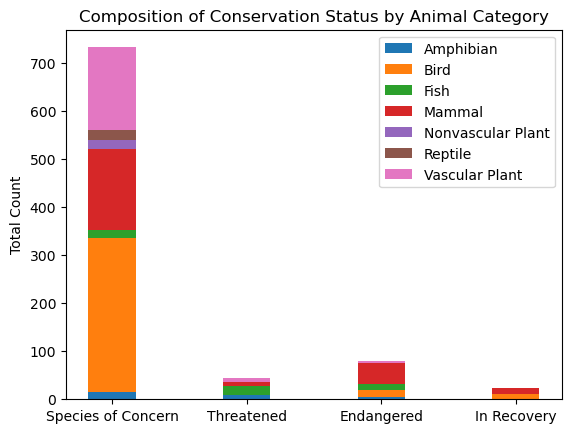

In [17]:
# list containing stacks ----------------------------------------------------------------------------------------------------- #
stacked_list = []

# Amphibian segments for stacked bar chart ----------------------------------------------------------------------------------- #
a_stack = list(category_count_df.iloc[0])
stacked_list.append(a_stack)

# Bird segments for bar chart ------------------------------------------------------------------------------------------------ #
b_stack = list(category_count_df.iloc[1])
stacked_list.append(b_stack)

# Fish segments for stacked bar chart ---------------------------------------------------------------------------------------- #
f_stack = list(category_count_df.iloc[2])
stacked_list.append(f_stack)

# Mammal segments for bar chart ---------------------------------------------------------------------------------------------- #
m_stack = list(category_count_df.iloc[3])
stacked_list.append(m_stack)

# Nonvascular Plant segments for bar chart ----------------------------------------------------------------------------------- #
n_stack = list(category_count_df.iloc[4])
stacked_list.append(n_stack)

# Reptile segments for bar chart --------------------------------------------------------------------------------------------- #
r_stack = list(category_count_df.iloc[5])
stacked_list.append(r_stack)

# Vascular Plant segments for bar chart -------------------------------------------------------------------------------------- #
v_stack = list(category_count_df.iloc[6])
stacked_list.append(v_stack)

# removing total_count and status count from stack lists --------------------------------------------------------------------- #
for lst in stacked_list:
    for i in range(3):
        lst.pop(0)

# stacked bar chart animals and conservation_status -------------------------------------------------------------------------- #
width = 0.35

fig, ax = plt.subplots()

labels = list(all_data_df["conservation_status"].unique())
labels.remove("None")

# bottoms of bar based on prev stacks ---------------------------------------------------------------------------------------- #
def lst_sum(l1, l2):
    new = [a+b for a, b in zip(l1, l2)]
    return new

a_top = a_stack
b_top = lst_sum(a_stack, b_stack)
f_top = lst_sum(b_top, f_stack)
m_top = lst_sum(f_top, m_stack)
n_top = lst_sum(m_top, n_stack)
r_top = lst_sum(n_top, r_stack)


ax.bar(labels, a_stack, width, bottom=0, label="Amphibian")
ax.bar(labels, b_stack, width, bottom=a_top, label="Bird")
ax.bar(labels, f_stack, width, bottom=b_top, label="Fish")
ax.bar(labels, m_stack, width, bottom=f_top, label="Mammal")
ax.bar(labels, n_stack, width, bottom=m_top, label="Nonvascular Plant")
ax.bar(labels, r_stack, width, bottom=n_top, label="Reptile")
ax.bar(labels, v_stack, width, bottom=r_top, label="Vascular Plant")

ax.set_ylabel("Total Count", rotation=90)
ax.set_title("Composition of Conservation Status by Animal Category")
ax.legend()

plt.show()

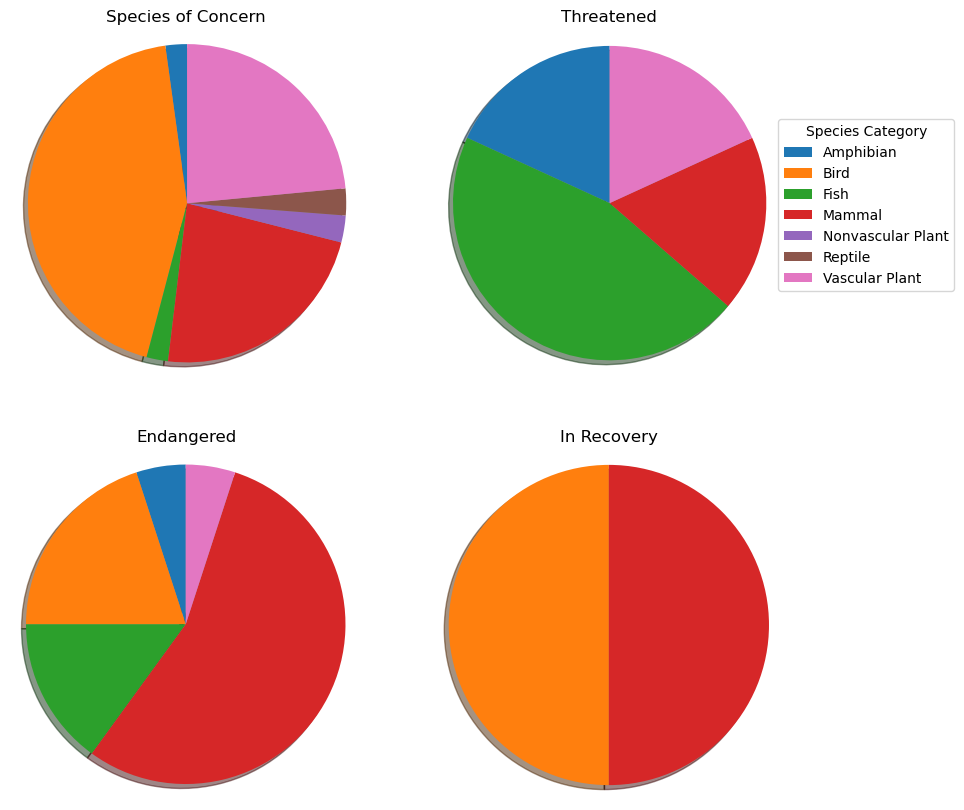

In [18]:
# pie_size lists for piechart ------------------------------------------------------------------------------------------------ #
concern_lst = list(category_count_df.concern_count)
threatened_lst = list(category_count_df.threatened_count)
endangered_lst = list(category_count_df.endangered_count)
recovery_lst = list(category_count_df.recovery_count)




# total count of endangered animals in endangered_lst ------------------------------------------------------------------------ #
labels = ['Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant', 'Amphibian', 'Reptile', 'Fish']
labels.sort()
#explode = (0, 0, 0, 0.1, 0, 0, 0)

# scatterplots to visualize wether or not there is a pattern in conservation_status, by park or category --------------------- #

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
ax.pie(concern_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("Species of Concern")

ax = fig.add_subplot(2, 2, 2)
ax.pie(threatened_lst, shadow=True, startangle=90)
ax.axis("equal")
ax.legend(labels, title="Species Category", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Threatened")

ax = fig.add_subplot(2, 2, 3)
ax.pie(endangered_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("Endangered")

ax = fig.add_subplot(2, 2, 4)
ax.pie(recovery_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("In Recovery")

plt.show()